<a href="https://colab.research.google.com/github/kimlind/ztm-pytorch-for-deeplearning/blob/second-lesson/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

end-to-end workflow


In [1]:
what_were_covering = {1: "Data(preparing and loading)",
                      2: "Build model",
                      3: "Fitting model to data (training)",
                      4: "Making predictions and evaluting a model (inference)",
                      5: "Saving and loading a model",
                      6: "Putting it all together"}
what_were_covering

{1: 'Data(preparing and loading)',
 2: 'Build model',
 3: 'Fitting model to data (training)',
 4: 'Making predictions and evaluting a model (inference)',
 5: 'Saving and loading a model',
 6: 'Putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all pytorch building blocks
import matplotlib.pyplot as plt

# Check PyTorch
torch.__version__

'2.1.0+cu121'

from typing_extensions import Text
## 1. Preparing and loading data

Data can be almost anything in machine learnign

* Excel spreadsheets
* Images
* Videos
* Audio
* Dna
* Text

Machine learning is a game of two parts
1. Get data into numerical representation
2. Build mode to learn patterns in representation

To Showcase this lets generate some *known* data using linear regression formula

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splittig data into training adn data test sets

Lets create training and test set with our data

In [5]:
# Create train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How do we better visualize the data?

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  """
  Plots training data, test data and compare predictions
  """

  plt.figure(figsize=(10,7))

  # plot training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # plot test data
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

  # Plot predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14});

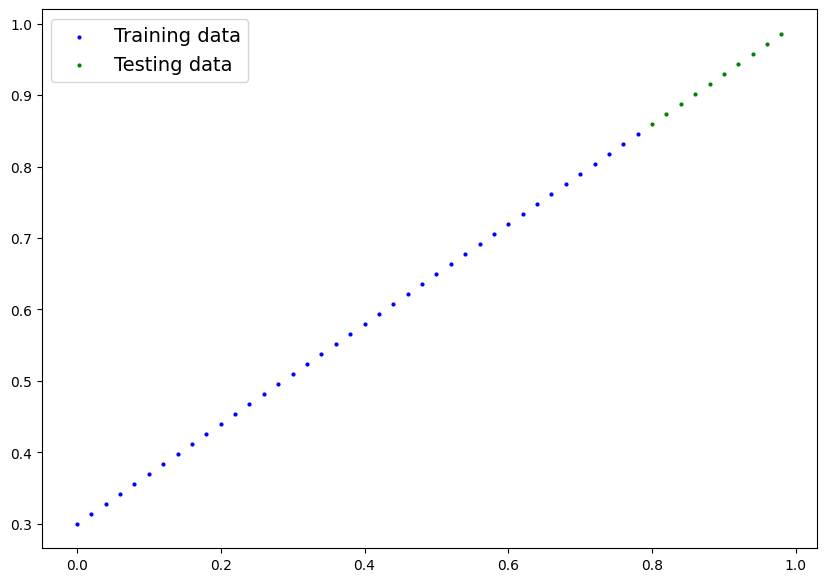

In [7]:
plot_predictions()

## 2. Build model

First PyTorch model

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values

How it does so?
Two main algorithms
1. Gradien descent
2. Backpropagation


In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything inherits froim nn.module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))#,
                                            #reguires_grad=True,
                                            #dtyp=torch.float))

    self.bias = nn.Parameter(torch.randn(1))#,
                                            #reguires_grad=True,
                                            #dtyp=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #<- X is the input data
    return self.weight * x + self.bias # Linear regression formula


### PyTroch Model building essentials

* Torch.nn - Contains all of the building for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - What paramters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it you should override forward() method
* torch.optim - Where optimizer in pytorch live. They will help with gradien descent
* def forward() - All nn.Module subclasses require you to override forward(), this method defines what happens in the forward computation


### Checking the content of our PyTorch Model

We can check model paramters or whats inside ourmodel using .parameter()

In [23]:
# Create random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()
model_0

#Check Model paramters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making predictions using torch.inference_mode()

To check models predictive power lets see how well it predicts y_test and x_test

when we pass the data through our model, its going to run it through the forward() method

In [12]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

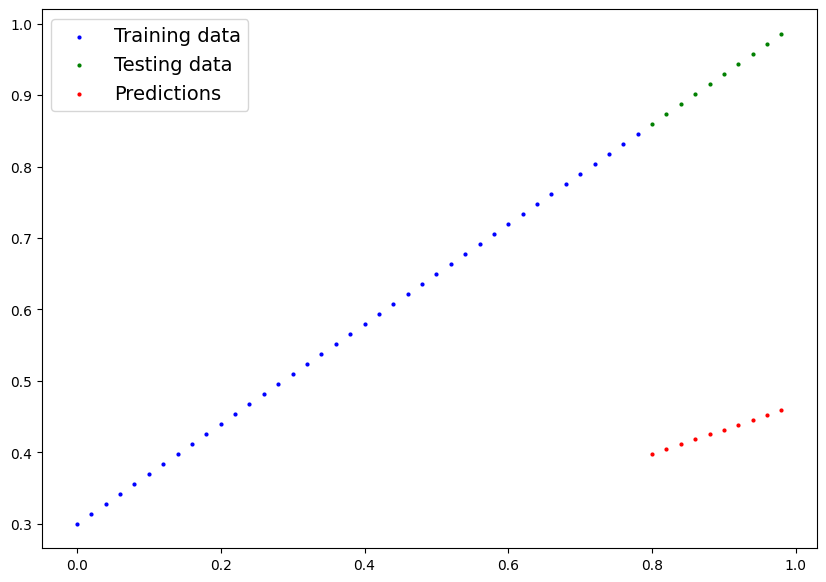

In [14]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea for a model to move from some *unknown* paramters to some *known* parameters

Or in other words fropm poor representation of the data to a better representation of the data

One way to measure how pooer or how wrong is to use loss functions

* Note: Loss functions may also be called cost functions or criterion in different areas.

Things we need to train:

* **Loss functions:** Function to measure how wrong model prediction is against test data. Lower the value the better performance
* **Optimizer:** Takes into account the loss of the model and adjusts the models parameters

And spefically for the Pytorch we need
* A training loop
* A testing loop


In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # lr=learning rate = most important hyperparameter

### Building a training loop and testing loop in PyTorch

Couple things we need in a training loop
0. Loop through data
1. Forward pass (this envolves data moving through our models forward() fucntions
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradiesnt of the each of the parameters of our model with respect to loss **(backpropagations)**
5. Optimizer step - use the optimizer to adjust our models parameters to try and improve the loss **(gradient descent)**


In [25]:
# Epoch is one loop through the data (hyperparamter)
epochs = 1800

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

#
torch.manual_seed(42)

### Training

#  0. loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimiser zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation with respect to the parameters of the mode
  loss.backward()

  #5. Step the optimizer (perform gradien descent)
  optimizer.step()

  ### Testing
  model_0.eval() # Turns off gradient tracking
  with torch.inference_mode(): # Turns off gradient tracking
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

print(f"Loss: {loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
Epoch: 100 | Loss: 0.19767141342163086 | Test Loss: 0.35847947001457214
Epoch: 200 | Loss: 0.08973254263401031 | Test Loss: 0.22795839607715607
Epoch: 300 | Loss: 0.05357731133699417 | Test Loss: 0.15086300671100616
Epoch: 400 | Loss: 0.04549176245927811 | Test Loss: 0.11657620966434479
Epoch: 500 | Loss: 0.04160415381193161 | Test Loss: 0.10088418424129486
Epoch: 600 | Loss: 0.03811401128768921 | Test Loss: 0.08986451476812363
Epoch: 700 | Loss: 0.03466346859931946 | Test Loss: 0.08097299933433533
Epoch: 800 | Loss: 0.03122851625084877 | Test Loss: 0.07297395914793015
Epoch: 900 | Loss: 0.027794325724244118 | Test Loss: 0.06490625441074371
Epoch: 1000 | Loss: 0.02435956709086895 | Test Loss: 0.05690721794962883
Epoch: 1100 | Loss: 0.02092517353594303 | Test Loss: 0.0488395169377327
Epoch: 1200 | Loss: 0.017490629106760025 | Test Loss: 0.04084048420190811
Epoch: 1300 | Loss: 0.014056024141609669 | Test Loss: 0.0327727

In [26]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [21]:
weight, bias

(0.7, 0.3)

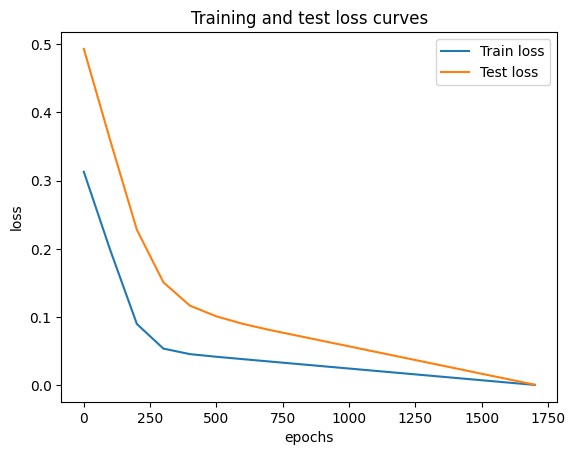

In [30]:
import numpy as np

# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

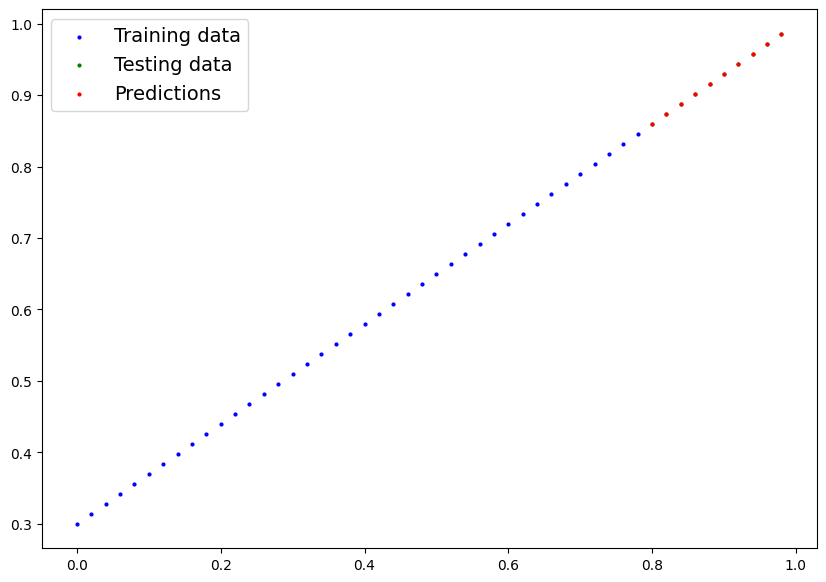

In [27]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

Three main methods to save and load models in PyTorch

1. torch.save() -- Allows you to save PyTorch object in Pythonhs pickle format
2. torch.load() -- Allows you load a saved PyTorch object
3. torch.nn.Module.load_state_dict() -- This allows to load models saved state dictionary

In [35]:
# Saving our PyTorch Model
from pathlib import Path

# 1 .Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our models state_dict(), we'll create a new instance of our model class and load the save state_dict() into that

In [39]:
# To load in saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [40]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [43]:
# make predictions wit our loaded model

loaded_model_0.eval()
model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
  model_preds = model_0(X_test)
loaded_model_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [44]:
# Compare loaded with original
model_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])